In [69]:
%pylab inline
lecture = 13
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


#Lecture 13: Numerical Methods for Partial Differential Equations

## Topics

* I. More on the stability of FDM for Black-Scholes
* II. Multi spatial variables: ADI method
* III. Numerical examples

# I. More on the stability of FDM for Black-Scholes:

* When $r \neq 0$:

\begin{aligned}
e^{a\triangle t} & = \left\{ \frac{1}{2}\sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} - r x_j \frac{\triangle t}{2\triangle x} \right\} e^{-il_m\triangle x}
\\
& + \left\{ 1 - \sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2}  -r \triangle t \right\}
\\
& + \left\{ \frac{1}{2}\sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} + r x_j \frac{\triangle t}{2\triangle x} \right\} e^{il_m\triangle x}
\end{aligned}

* which is

$$
e^{a\triangle t}  = 1 - r\triangle t + \sigma^2 x_j^2 \frac{\triangle t}{\triangle x^2} \cdot 2\sin^2(l_m\triangle x/2) + i\; r x_j \frac{\triangle t}{\triangle x} \sin(l_m\triangle x)
$$



* To satisfy $ |e^{a\triangle t}| < 1 $, we require

\begin{aligned}
\renewcommand{PDut}{\frac{\partial u}{\partial t}}
\renewcommand{PDux}{\frac{\partial u}{\partial x}}
\renewcommand{PDutt}{\frac{\partial ^2u}{\partial t^2}}
\renewcommand{PDuxx}{\frac{\partial ^2u}{\partial x^2}}
\renewcommand{FDut}{\frac{u_{i,k+1}-u_{i,k}}{\triangle t}}
\renewcommand{FDutb}{\frac{u_{i,k}-u_{i,k-1}}{\triangle t}}
\renewcommand{FDutc}{\frac{u_{i,k+1}-u_{i,k-1}}{2\triangle t}}
\renewcommand{FDutt}{\frac{u_{i,k+1}-2u_{i,k}+u_{i,k-1}}{\triangle t^2}}
\renewcommand{FDux}{\frac{u_{i+1,k}-u_{i,k}}{\triangle x}}
\renewcommand{FDuxb}{\frac{u_{i,k}-u_{i-1,k}}{\triangle x}}
\renewcommand{FDuxc}{\frac{u_{i+1,k}-u_{i-1,k}}{2\triangle x}}
\renewcommand{FDuxx}{\frac{u_{i+1,k}-2u_{i,k}+u_{i-1,k}}{\triangle x^2}}
& r >0,
\\
& \triangle t < \frac{\triangle x^2}{ \sigma^2 x_{max}^2 },
\\
& \triangle t < \frac{ \sigma^2 }{r^2 }.
\end{aligned}


* The first condition is trivial (until the FED decrees all rates to be negative!)

* The last condition does not have much impact in practice unless the volatility is very small.

* So the important one is the second condition, which is what we went through last lecture.



# II. The Case of more than one spatial variables


* Most numerical methods, FDM included, suffer the "dimentionality" curse, i.e. the size, complexity of the problem grow exponentially with the dimension.


* Usually, Monte Carlo method is the only practical option in dimension $\geq 3$.


* But for two dimensional problems, it is worthwhile to explore the FDM further.


* Finance examples that you will need many sptial variables: stochastic vol model, convertible bonds, credit risky bonds, variable annuities, etc.



## Heston Stochastic Volatility Model

* ** Heston Stochastic Vol Model  **


\begin{aligned}
& dS_t = rS_t dt + \sqrt{\nu_t}S_t dW_t^1
\\
& d\nu_t = \kappa(\theta - \nu_t) + \xi\sqrt{\nu_t}  dW_t^2
\\
& \hspace{0.2in} \left< dW_t^1, dW_t^2 \right> = \rho dt
\end{aligned}





### PDE for Heston Stochastic Vol Model:


\begin{aligned}
\renewcommand{PDuS}{\frac{\partial u}{\partial S}}
\renewcommand{PDuSS}{\frac{\partial ^2u}{\partial S^2}}
\PDut &+ rS\PDuS+ (\kappa(\theta - \nu)-\lambda \nu )\frac{\partial u}{\partial \nu} 
\\
& + \frac{1}{2}\nu S^2\PDuSS + \rho\xi\nu S\frac{\partial^2 u}{\partial S\partial \nu} + \frac{1}{2}\xi^2\nu\frac{\partial^2 u}{\partial \nu^2} - ru = 0
\end{aligned}




## Alternating Direction Implicit Method

* Write the Crank-Nicolson method as

\begin{aligned}
\small
\renewcommand{fD}{\mathfrak{D}}
\FDut  = & \frac{1}{4}  \sigma^2 x_i^2 \left\{ \FDuxx + \frac{u_{i+1,k+1}-2u_{i,k+1}+u_{i-1,k+1}}{\triangle x^2} \right\}
\\ 
    & + \frac{1}{2} r x_i \left\{ \FDuxc + \frac{u_{i+1,k+1}-u_{i-1,k+1}}{2\triangle x} \right\} 
\\
    & - \frac{1}{2} r \left\{  u_{i,k} +  u_{i,k+1} \right\} 
\\
    = & - \frac{1}{2} \mathfrak{D}\cdot (  u_{i,k} +  u_{i,k+1} )
\end{aligned}


where $ \mathfrak{D}\cdot  u_{i,k} $ can be considered as the Crank-Nicolson finite difference operator on $u_{i,k}$.


### Crank-Nicolson in operator format


* The Crank-Nicolson scheme can be denoted as

$$
(1 + \frac{1}{2}\triangle t\fD)\cdot u_{i,k+1} = (1 - \frac{1}{2}\triangle t\fD)\cdot u_{i,k}
$$

* This is also applicable when the spatial variable $x_i$ is a vector.

* For the one spatial variable case, the operator $\fD$ involves three points in one time slice.

* For two dimension case (the Heston model above), the operator will involve five points in one time slice.

* So instead of solving a tridiagonal system, now the linear system has five nonzero diagonals, which is much more costly  to solve.




### Operator split 


* For the general $n$ spatial variables case, the way to ease the linear system solving (still can't get rid of the problem of the number of discretization points exploded!) is **splitting** the operator $\fD$:

\begin{aligned}
(1 + \frac{1}{2}\triangle t\fD^1)\cdot \tilde{u}^1_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^1)\cdot u_{i,k}
\\
(1 + \frac{1}{2}\triangle t\fD^2)\cdot \tilde{u}^2_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^2)\cdot \tilde{u}^1_{i,k}
\\
\vdots
\\
(1 + \frac{1}{2}\triangle t\fD^n)\cdot \tilde{u}^n_{i,k+1} &= (1-\frac{1}{2}\triangle t\fD^n)\cdot \tilde{u}^{n-1}_{i,k}
\end{aligned}

and set

$$
u_{i+1,k} = \tilde{u}^n_{i,k}
$$





* Essentially, this says trying to solve the problem in a multistep aproach: each step is equivalent to the one dimensional Crank-Nicolson method.


* This is  merely the basic form, the strategy can be customized to further improve the efficiency (not all steps are implicit) or accuracy (high order)


# III. Numerical Examples 

* Black Scholes formulae and FDM methods for vanilla European call and up-and-out Barrier Call.





## Vanilla European Option:
* Strike = 100
* Risk Free Rate = 5%
* Constant Volatility = 35%
* Option Maturity = 1 year
* Option Type = Call

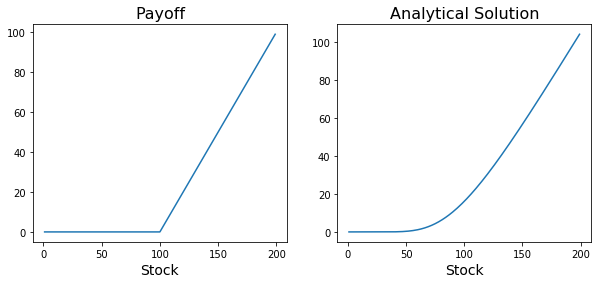

In [70]:
import numpy as np
from scipy.stats import norm
import time 

#Black and Scholes
def BlackScholesFormula(type, S0, K, r, sigma, T):
    dtmp1 = np.log(S0 / K)
    dtmp2 = 1.0/(sigma * np.sqrt(T))
    sigsq = 0.5 * sigma * sigma
    d1 =  dtmp2 * (dtmp1 + T * (r + sigsq))
    d2 =  dtmp2 * (dtmp1 + T * (r - sigsq))
    if type=="C":
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * stats.cdf(-d2) - S0 * norm.cdf(-d1)

K = 100.0
r = 0.05
sigma = 0.35
T = 1
putCall ='C'

Smin = 0.0
Smax = 200.0
ns = 201
Ss = np.linspace(Smin, Smax, ns, endpoint=True)
Ss = Ss[1:-1]
#print Ss

t=time.time()
px = BlackScholesFormula(putCall, Ss, K, r, sigma, T)
elapsed=time.time()-t
#print(px)
#print("Elapsed Time:", elapsed)
#idx = 200-1
#print Ss[idx]
#print px[idx]

payoff = clip(Ss-K, 0.0, 1e600)
#print "payoff = ", payoff

figure(figsize=[10, 4])
subplot(1, 2, 1)
plot(Ss, payoff)
xlabel('Stock', fontsize=14);
title('Payoff' , fontsize=16);

subplot(1, 2, 2)
plot(Ss, px)
xlabel('Stock', fontsize=14);
title('Analytical Solution' , fontsize=16);

## Discretization parameters and results for the forward scheme

In [71]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_explicit:
  def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
    self.r  = r 
    self.sigma = sigma 
    self.maturity  = maturity

    self.Smin = Smin     
    self.Smax = Smax
    self.Fl = Fl        
    self.Fu = Fu

    self.nt  = nt
    self.ns  = ns
    
    self.dt = float(maturity)/nt
    self.dx = float(Smax-Smin)/(ns+1)
    self.xs = Smin/self.dx

    self.u = empty((nt + 1, ns))
    self.u[0,:] = payoff

    ## Building Coefficient matrix:        
    A = sparse.lil_matrix((self.ns, self.ns))

    for j in range(0, self.ns):
      xd = j + 1 + self.xs
      sx = self.sigma * xd
      sxsq = sx * sx
      
      dtmp1 = self.dt * sxsq
      dtmp2 = self.dt * self.r
      A[j,j] = 1.0 - dtmp1 - dtmp2
      dtmp1 = 0.5 * dtmp1
      dtmp2 = 0.5 * dtmp2 * xd
      if j > 0:
        A[j,j-1] = dtmp1 - dtmp2
      if j < self.ns - 1:
        A[j,j+1] = dtmp1 + dtmp2

    self.A = A.tocsr()

    ### Building bc_coef:
    nxl = 1 + self.xs
    sxl = self.sigma * nxl
    nxu = self.ns + self.xs
    sxu = self.sigma * nxu
    
    self.blcoef = 0.5 * self.dt * (sxl * sxl - self.r * nxl)
    self.bucoef = 0.5 * self.dt * (sxu * sxu + self.r * nxu)
    
  def solve(self):
    for i in range(0, m):
        self.u[i+1,:]          = self.A * self.u[i,:]
        self.u[i+1,0]         += self.blcoef * self.Fl[i]
        self.u[i+1,self.ns-1] += self.bucoef * self.Fu[i]

    return self.u

dx = (Smax - Smin)/(ns-1)
print("Smin = ", Smin)
print("Smax = ", Smax)
print("ns =", ns)
print("dx =", dx)
print("sigma =", sigma)
dt_max = dx*dx/(sigma*sigma*Smax*Smax)
print("by CFL, dt <", "%.4f"%dt_max)
mt_min = int(T/dt_max)+1
print("which requires in time domain the number of steps ~= ", mt_min)



Smin =  0.0
Smax =  200.0
ns = 201
dx = 1.0
sigma = 0.35
by CFL, dt < 0.0002
which requires in time domain the number of steps ~=  4900


Elapsed Time1: 0.11122798919677734
Elapsed Time2: 0.10223126411437988
Elapsed Time3: 0.09488534927368164


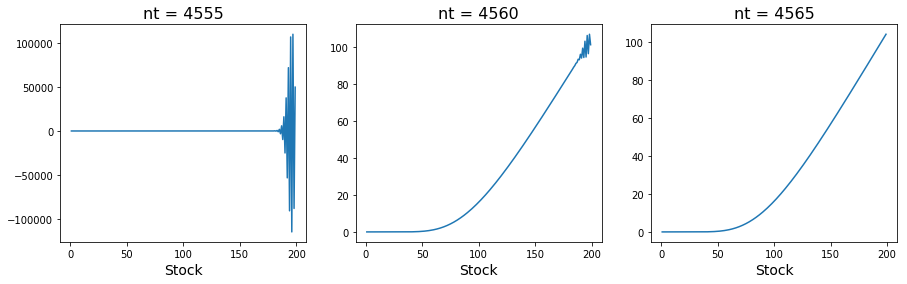

In [72]:
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
#print "payoff = ", payoff
  
m = 4555 
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

##print  px_fd_mat.shape
nrow = len(px_fd_mat[:,1])
#print(px_fd_mat[nrow-1,:])

figure(figsize=[15, 4]);
subplot(1, 3, 1)
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 4560
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 4565
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f' % m, fontsize=16);

## Similar results for the up-and-out Barrier Option: with barrier set at S = 120

Elapsed Time1: 0.09915733337402344
Elapsed Time2: 0.08566570281982422
Elapsed Time3: 0.09280514717102051


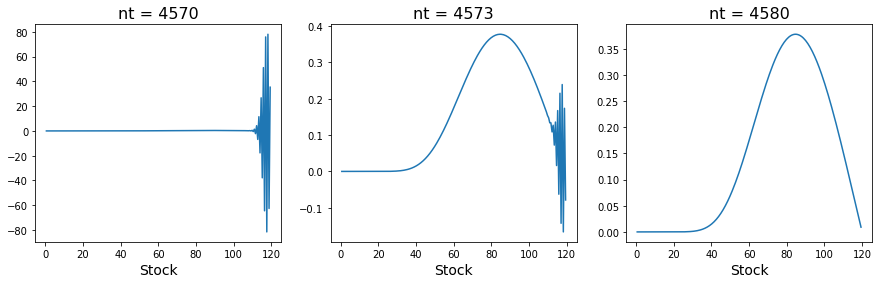

In [73]:
Smax = 120
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
#print "payoff = ", payoff
  
m = 4570
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs1 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

##print  px_fd_mat.shape
nrow = len(px_fd_mat[:,1])
#print(px_fd_mat[nrow-1,:])

figure(figsize=[15, 4]);
subplot(1, 3, 1)
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 4573
Fl = zeros((m+1,))
Fu = zeros((m+1,))

t = time.time()
bs2 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 4580
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs3 = BS_FDM_explicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f' % m, fontsize=16);

## Now look at the behavior of the implicit scheme

In [74]:
from scipy import sparse
import scipy.sparse.linalg.dsolve as linsolve

class BS_FDM_implicit:
  def __init__(self, 
               r, 
               sigma, 
               maturity, 
               Smin, 
               Smax, 
               Fl, 
               Fu, 
               payoff, 
               nt, 
               ns):
    self.r  = r 
    self.sigma = sigma 
    self.maturity  = maturity

    self.Smin = Smin     
    self.Smax = Smax
    self.Fl = Fl        
    self.Fu = Fu

    self.nt  = nt
    self.ns  = ns
    
    self.dt = float(maturity)/nt
    self.dx = float(Smax-Smin)/(ns+1)
    self.xs = Smin/self.dx

    self.u = empty((nt + 1, ns))
    self.u[0,:] = payoff

    ## Building Coefficient matrix:        
    A = sparse.lil_matrix((self.ns, self.ns))

    for j in range(0, self.ns):
      xd = j + 1 + self.xs
      sx = self.sigma * xd
      sxsq = sx * sx
      
      dtmp1 = self.dt * sxsq
      dtmp2 = self.dt * self.r
      A[j,j] = 1.0 + dtmp1 + dtmp2
        
      dtmp1 = -0.5 * dtmp1
      dtmp2 = -0.5 * dtmp2 * xd
      if j > 0:
        A[j,j-1] = dtmp1 - dtmp2
      if j < self.ns - 1:
        A[j,j+1] = dtmp1 + dtmp2

    self.A = linsolve.splu(A)
    self.rhs = empty((self.ns, ))
    
    ### Building bc_coef:
    nxl = 1 + self.xs
    sxl = self.sigma * nxl
    nxu = self.ns + self.xs
    sxu = self.sigma * nxu
    
    self.blcoef = 0.5 * self.dt * (- sxl * sxl + self.r * nxl)
    self.bucoef = 0.5 * self.dt * (- sxu * sxu - self.r * nxu)    
    
  def solve(self):
    for i in range(0, m):
        self.rhs[:] = self.u[i,:]
        self.rhs[0]         -= self.blcoef * self.Fl[i]
        self.rhs[self.ns-1] -= self.bucoef * self.Fu[i]
        self.u[i+1,:] = self.A.solve(self.rhs)

    return self.u



Elapsed Time1: 0.13730168342590332
Elapsed Time2: 0.03946208953857422
Elapsed Time3: 0.010237455368041992


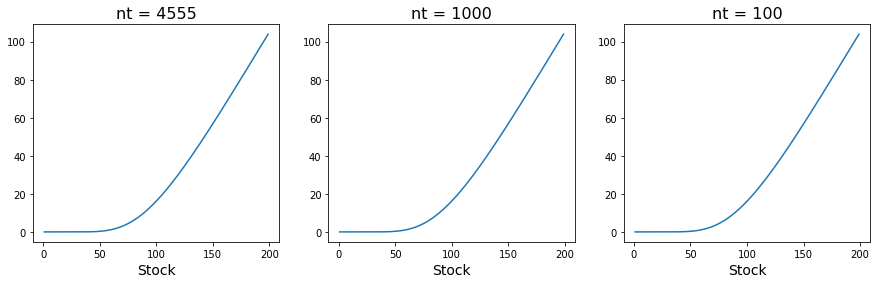

In [75]:
Smax = 200
n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
  
m = 4555 
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs1 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

#print  px_fd_mat.shape

figure(figsize=[15, 4]);
subplot(1, 3, 1)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m,  fontsize=16);

m = 1000
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))

t = time.time()
bs2 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 100
Fl = zeros((m+1,))
Fu = Smax - K*exp(-r * linspace(0.0, T, m+1))
    
t = time.time()
bs3 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);


#print(px_fd_mat[nrow-1,:])


Elapsed Time1: 0.2161719799041748
Elapsed Time2: 0.04758620262145996
Elapsed Time3: 0.012785196304321289


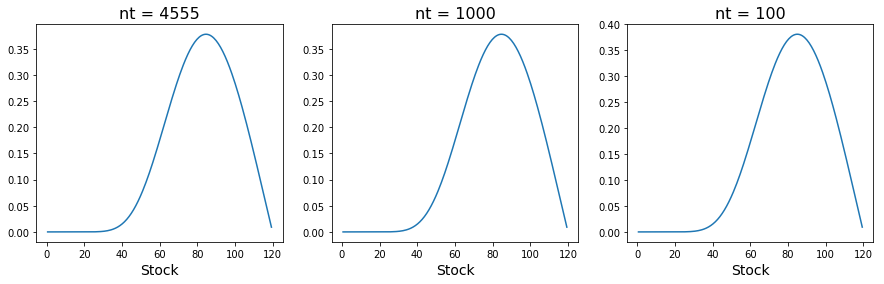

In [76]:
Smax = 120

n = ns-2
X = linspace(0.0, Smax, n+2)
X = X[1:-1]

payoff = clip(X-K, 0.0, 1e600)
  
m = 4555 
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs1 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs1.solve()
elapsed=time.time()-t
print("Elapsed Time1:", elapsed)

#print  px_fd_mat.shape

figure(figsize=[15, 4]);
subplot(1, 3, 1)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m,  fontsize=16);

m = 1000
Fl = zeros((m+1,))
Fu = zeros((m+1,))

t = time.time()
bs2 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs2.solve()
elapsed=time.time()-t
print("Elapsed Time2:", elapsed)

subplot(1, 3, 2)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);

m = 100
Fl = zeros((m+1,))
Fu = zeros((m+1,))
    
t = time.time()
bs3 = BS_FDM_implicit(r, sigma, T, Smin, Smax, Fl, Fu, payoff, m, n)
px_fd_mat = bs3.solve()
elapsed=time.time()-t
print("Elapsed Time3:", elapsed)

subplot(1, 3, 3)
nrow = len(px_fd_mat[:,1])
plot(X, px_fd_mat[nrow-1,:])
xlabel('Stock', fontsize=14);
title('nt = %.f'%m, fontsize=16);


#print(px_fd_mat[nrow-1,:])


# Homework 

* Implement the FDM for Black-Scholes PDE using the Crank-Nicolson Scheme and test your code using the same example here for both the vanilla European Call and the Up-and-out Barrier Call.



